In [1]:
import numpy as np

import matplotlib.pyplot as plt

import matplotlib

import matplotlib.colors as colors
#
converter = colors.ColorConverter()
import os
import sys
from tqdm import tqdm
sys.path[0] = "/home/cooper-cooper/Desktop/vans/"
plt.style.use('results/plots/style.mplstyle')
matplotlib.rc("text",usetex=True)
plt.rcParams["font.family"] = "Times New Roman"


from utilities.evaluator import Evaluator
import numpy as np
import matplotlib.pyplot as plt
# from utilities.misc import compute_ground_energy_1
from utilities.variational import VQE
import os
import matplotlib.colors as colors
#
converter = colors.ColorConverter()

In [13]:
energies=[]
grounds=[]
for j in tqdm(np.arange(0,3.5,.5)):
    
    args={"n_qubits":8,"problem_config":{"problem" : "XXZ", "g":1.0, "J": j}, "load_displaying":False}
    evaluator = Evaluator(args,loading=True, path="../data-vans/")
    energies.append(evaluator.evolution[evaluator.get_best_iteration()][1])
    vqe_handler = VQE(n_qubits=args["n_qubits"],problem_config=args["problem_config"])
    grounds.append(vqe_handler.lower_bound_energy)
#     obs = vqe_handler.observable
#     eigs = compute_ground_energy_1(obs, vqe_handler.qubits)
#     eigens[j] = eigs[:3]

100%|██████████| 7/7 [00:08<00:00,  1.24s/it]


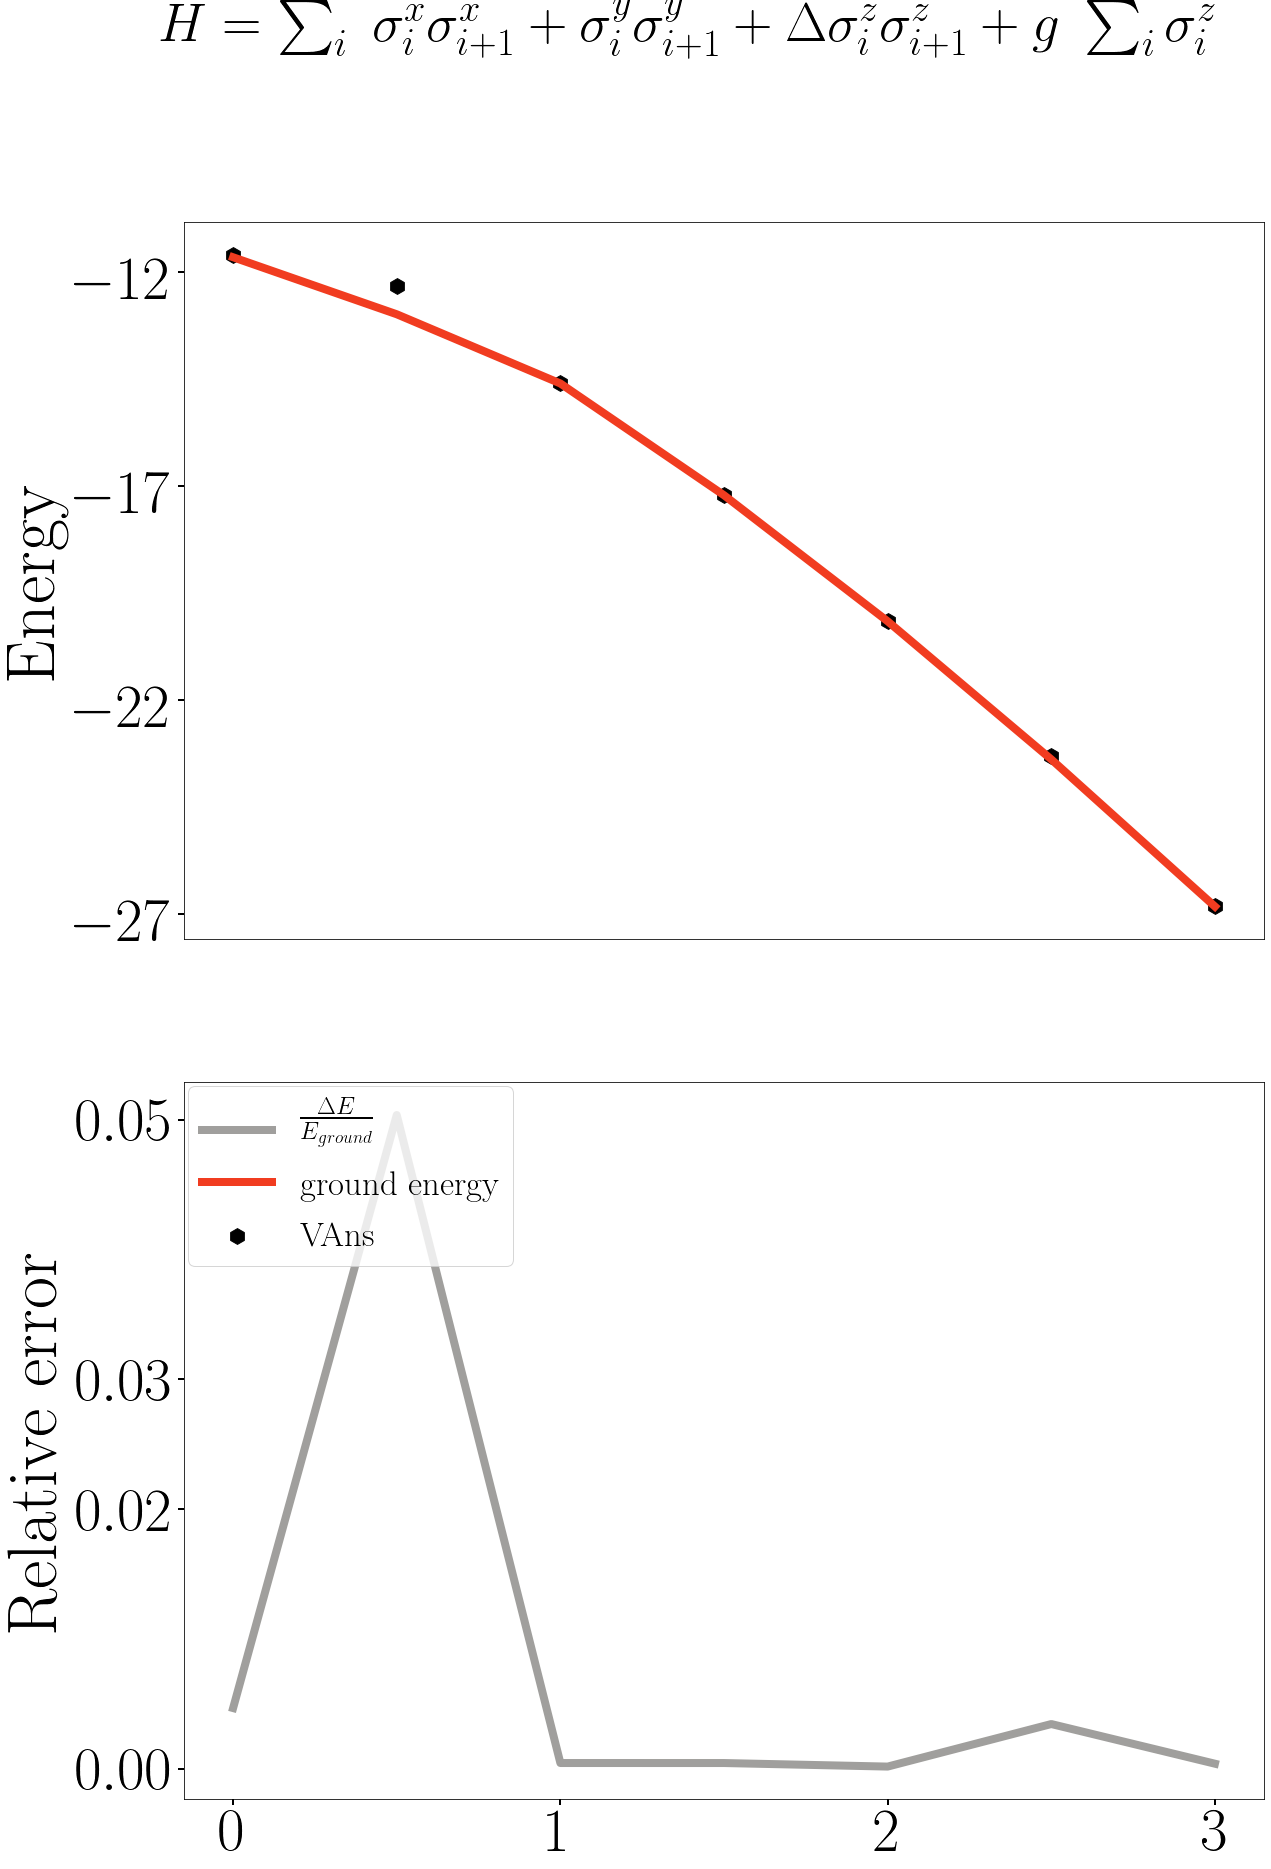

In [14]:
js=np.arange(0,3.5,.5)
energies=np.array(energies)
ge = np.array(grounds)
relatives=np.abs((energies-ge)/ge)

converter = colors.ColorConverter()

####### SINGLE AXIS ####
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset


color1="#D79922"
color2="#4056A1"
color3="#F13C20"
color4="#5D001E"
color5="#8E8D8A"

plt.figure(figsize=(20,30))
ax1 = plt.subplot2grid((2,1),(0,0))
ax2 = plt.subplot2grid((2,1),(1,0))

plt.subplots_adjust(bottom=0.15,left=0.15)
plt.suptitle(r'$H = \sum_i \;\sigma_i^x \sigma^x_{i+1} + \sigma^{y}_i \sigma^y_{i+1} + \Delta \sigma^z_i \sigma^z_{i+1} + g \;\sum_i \sigma_i^{z}$',size=55)
ax1.scatter(js,energies, marker="h",s=250, alpha=1, color="black", label="VAns")
ax1.plot(js,np.array(ge), color=converter.to_rgb(color3),alpha=1, label="ground energy")

ax1.set_yticks([np.round(k,0) for k in np.linspace(np.min(energies), np.max(energies), 4)])
ax1.tick_params(direction='out', length=6, width=2, colors='black', grid_alpha=0.5)

energies=np.array(energies)
ax2.plot(js,np.abs((energies-np.array(ge))/ge), color=converter.to_rgb(color5),alpha=0.84, label=r'$\frac{\Delta E}{E_{ground}}$')
# ax2.plot(js,np.abs((energies-np.array(ge1))/ge1),color=converter.to_rgb(color2), alpha=1, label="first excited")
# ax2.plot(js,np.abs((energies-np.array(ge2))/ge2), '--',color=converter.to_rgb(color1),alpha=1, label="second excited")
#
# #
ind1=int(0.3*len(energies))
ind2=ind1+20
#axins = inset_axes(ax1, width="70%", height="70%", borderpad=3, loc=3, bbox_to_anchor=(.1, .05, .8, .45), bbox_transform=ax1.transAxes)
#axins.scatter(js[ind1:ind2],energies[ind1:ind2], marker="h",s=250, alpha=1, color="black", label="VAns")
#axins.plot(js[ind1:ind2],np.array(ge)[ind1:ind2], color=converter.to_rgb(color3),alpha=1, label="ground energy")

#axins.yaxis.set_visible(False)
#axins.xaxis.set_visible(False)
#mark_inset(ax1,axins,loc1=2, loc2=1,fc="none", lw=2, ec='r')

# axins.scatter(js,relatives, s=300, color="green", alpha=0.7, label=r'$\frac{\Delta E}{E_{ground}}$')


ax1.xaxis.set_visible(False)
ax2.set_yticks([np.round(k,2) for k in np.linspace(0., np.max(np.abs((energies-np.array(ge))/ge)), 4)])
ax2.tick_params(direction='out', length=6, width=2, colors='black', grid_alpha=0.5)
ax2.set_ylabel("Relative error",size=70)
ax1.set_ylabel("Energy",size=70)
#
# axins.set_yticks([np.round(k,2) for k in np.linspace(np.min(relatives), np.max(relatives), 4)])
# axins.yaxis.tick_right()
# axins.tick_params(direction='out', length=3, width=1, colors='black',grid_color='r', grid_alpha=0.5))
# # axins.set_yticks([], minor=True)
# labs = [l.get_label() for l in [ax1,axins]]
#
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
#
###incremento x ---> se va a la izquierda. Incremento y ---> se va para arriba  bbox_to_anchor=(.05, .9)
ax2.legend(lines2+lines, labels2+labels, prop={"size":35}, loc=2, borderaxespad=.1)
plt.savefig("results/xxz/xxz8qbits_betteralgo.pdf",format="pdf")